# Исследование данных интернет-магазина компьютерных игр «Стримчик»

**Описание проекта.**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных.**

    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы проданных копий)
    - EU_sales — продажи в Европе (миллионы проданных копий)
    - JP_sales — продажи в Японии (миллионы проданных копий)
    - Other_sales — продажи в других странах (миллионы проданных копий)
    - Critic_Score — оценка критиков (максимум 100)
    - User_Score — оценка пользователей (максимум 10)
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цель исследования:**

- Изучить количество выпускаемых игр по годам
- Определить платформы, лидирующие по продажам за актуальный период
- Определить влияние отзывов пользователей и критиков  на продажи
- Составить портрет пользователя каждого региона
- Выполнить проверку следующих гипотез: 

    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    2) Средние пользовательские рейтинги жанров Action и Sports разные.
    
**В ходе работы планируется:**

1) Изучить общую информацию о полученных датафреймах

2) Выполнить предобработку данных: заменить названия столбцов (по необходимости), по возможности заполнить пропуски при наличии; обработать дубликаты (если они есть); определить выбивающиеся и аномальные значения; изучить тип данных столбцов и выполнить преобразования типов данных, где это необходимо для дальнейшего анализа; добавить в таблицу новый столбец с суммарными продажами во всех регионах

3) В ходе проведения исследовательского анализа: 

    - изучить: количество выпускаемых игр по годам, изменение продаж по платформам
    - по данным за соответствующий актуальный период определить какие платформы лидируют по продажам, растут или падают
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат
    - определить влияние отзывов пользователей и критиков  на продажи
    - определить выделяются ли жанры с высокими и низкими продажами

4) Составить портрет пользователя каждого региона

5) Выполнить проверку гипотез

6) Написать общий вывод


#### Загрузка данных.

In [1]:
# импорт нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла с данными
data = pd.read_csv('/datasets/games.csv')

In [3]:
# снятие ограничений на количество отображаемых столбцов и количество символов в записи
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

##### Изучение общей информации

In [4]:
# вывод 10 первых строк таблицы data
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# получение информации о пропусках и типах данных в таблице data_users
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов, 16715 строк. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Столбец *User_Score* - оценка пользователей имеет тип object, хотя это числовое значение - рассмотрим, почему возник такой тип данных, после приведем к типу float.



In [6]:
# сохранение в переменной data_shape количество строк исходного датафрейма
data_shape = data.shape[0]

##### Изучение пропущенных значений

In [7]:
# подсчет пропусков в количественном и процентном отношении
data_missing = {
              'missing_count': data.isnull().sum(),
              'missing_percent': data.isnull().sum()/len(data)*100
               }
                         
df_missing = pd.DataFrame(data_missing)
df_missing.sort_values('missing_count', ascending=False)

,missing_count,missing_percent
Critic_Score,8578,51.319174
Rating,6766,40.478612
User_Score,6701,40.089740
Year_of_Release,269,1.609333
Name,2,0.011965
Genre,2,0.011965
Platform,0,0.000000
NA_sales,0,0.000000
EU_sales,0,0.000000
JP_sales,0,0.000000


In [8]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


Много пропущенных значений в столбцах *Critic_Score*, *Rating* и *User_Score*. 
Рассмортим за какой период предоставлены данные.

In [9]:
data['Year_of_Release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Данные с 1980 по 2016 год. Вероятно пропуски в столбцах с оценкой критиков, рейтингом от ESBR и оценкой пользователей могли возникнуть в связи с тем, что не раньше не было сервисов/ возможности/ практики для оценивания игр.

Рейтинг от ESRB основан в 1994 году и был принят только в  2005 году. Варианты заполнения пропусков опищу перед их заполнением.

 **Предварительно на этапе предобработки данных необходимо сделать следующее:**
 
- переименовать названия колонок (выявленные нарушения: строчные буквы сочетаются с прописными)
- изменить тип данных столбцов:
	* ` User_Score` — оценка пользователей (приведем к числовому типу данных float);
- проверить на наличие дубликатов
- описать спопосбы обработки и обработать пропущенные значения 
- добавить столбец с суммарными продажами во всех регионах

#### Предобработка данных.

##### Переименование столбцов

In [10]:
# вывод списка названий столбцов таблицы data
data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Приведем названия столбцов к нижнему регистру

In [11]:
# переименование столбцов
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Преобразование данных в нужные типы



` user_score` — оценка пользователей (приведем к числовому типу данных float);

In [12]:
# вывод уникальных значений стобца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок пользователей есть значение 'tbd'. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Вероятно оценка игры еще не определена. Заменим эти значения на Nan. После чего изменим тип данных столбца.

In [13]:
# замена tbd на Nan
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [14]:
# изменение типа данных столбца
data['user_score'] = data['user_score'].astype('float')

##### Проверка наличия дубликатов в датафреймe data

In [15]:
# подсчет явных дубликатов таблицы data
data.duplicated().sum()

0

Явные дубликаты отсутсвуют

Проверим на наличие неявных дубликатов в жанре

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [17]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Есть две повторяющиеся игры. Игра без названия и жанра будут удалена в обработке пропущенных значений. Удалю строку с игрой без продаж по регионам.

In [18]:
data = data.drop(index=16230 )

##### Обработка пропущенных значений

**Варианты заполнения пропусков (если возможно):**

Ни в одном из следующих столбцов: critic_score, user_score невозможно заполнить пропуски медианным или средним значением, так как их много и это может сильно исказить данные для дальнейшего анализа.

Столбцец rating содержит информацию о возрастном рейтинге, соотвественно так же нет возможности использовать медиану и среднее. 

- **critic_score** и **user_score** - заменим на 0, предварительно убедившись, что игр с таким рейтингом нет. В дальнейшем анализе будем иметь в виду, что игры с нулевым рейтингом - это игры, где рейтинг не проставлен.

- **rating**  - пропуски в данном столбце заменим на 'indefined' - не определен

- **year_of_release** - таких пропусков менее 2%, и проставлять медианным и средним значением - нецелесообразно. Данных для анализа достаточно, поэтому оставим это пропуски нетронутыми.

- **name** и **genre** - проверим, нет ли взаимосвязи между этими пропусками. Если есть, удалим 2 строки.

Проверим наличие игр с нулевым рейтингом критиков и пользователей.

In [19]:
# срез таблицы со значением 0 в столбце critic_score
data.query('critic_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
# срез таблицы со значением 0 в столбце user_score
data.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


Не оценили пользователи игру My Little Pony. Заменим пропуски в столбцах *critic_score* и *user_score* на 0.

In [21]:
# замена пустых значений столбцов critic_score и user_score на 0
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

Заменим пропуски в столбце *rating* на 'indefined' 

In [22]:
# замена пустых значений столбца rating на indefined
data['rating'] = data['rating'].fillna('indefined')

Проверим, совпадают ли игры с пропущенными значениями в названии и жанре. Если да, то удалим эти строки.

In [23]:
# проверка пустых значений в столбце name
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,0.0,0.0,indefined
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,0.0,0.0,indefined


In [24]:
# удаление строк с пропусками в названии игр
data = data.query('name.notnull()')

Проверим, что осталось по пропускам и объем сохраненных данных.

In [25]:
# подсчет пропусков в количественном и процентном отношении
data_missing = {
              'missing_count': data.isnull().sum(),
              'missing_percent': data.isnull().sum()/len(data)*100
               }
                         
df_missing = pd.DataFrame(data_missing)
df_missing.sort_values('missing_count', ascending=False)

,missing_count,missing_percent
year_of_release,269,1.609622
name,0,0.000000
platform,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,0,0.000000
user_score,0,0.000000


In [26]:
# сохранение в переменной data_shape_new количество строк после предобработки
data_shape_new = data.shape[0]

In [27]:
print('Удалено строк:', data_shape - data_shape_new)

Удалено строк: 3


##### Подсчет суммарных продаж во всех регионах 

In [28]:
# довавление столбца total_sales с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,indefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,indefined,31.38


**На этапе предобработки данных выполнено:**


- названия колонок приведены к нижнему регистру
- в столбце user_score значения tbd заменены на Nan, после чего столбец приведен к числовому типу данных float);
- проверка на наличие явных дубликатов в таблице и наличие неявных дубликатов в столбце *genre*
- описаны спопосбы обработки и обработаны пропущенные значения следующим образом:
    * пропуски в столбцах *critic_score* и *user_score* заменены на 0
    * пропуски в столбце *rating* заменены на 'indefined'
    * удалены 2 строки с отсутсвующим названием игры и жанром
- добавлен столбец с суммарными продажами во всех регионах

#### Исследовательский анализ данных.

В ходе проведения исследовательского анализа планируется: 

    - изучить: количество выпускаемых игр по годам, изменение продаж по платформам
    - по данным за соответствующий актуальный период определить какие платформы лидируют по продажам, растут или падают
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описать результат
    - определить влияние отзывов пользователей и критиков  на продажи
    - определить выделяются ли жанры с высокими и низкими продажами

##### Количество выпущенных игр по годам

Рассмотрм, сколько игр выпускалось в каждый из представленных в таблице год.

In [30]:
# создание сводной таблицы: группируем по году и считаем количество выпущенных игр
data_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

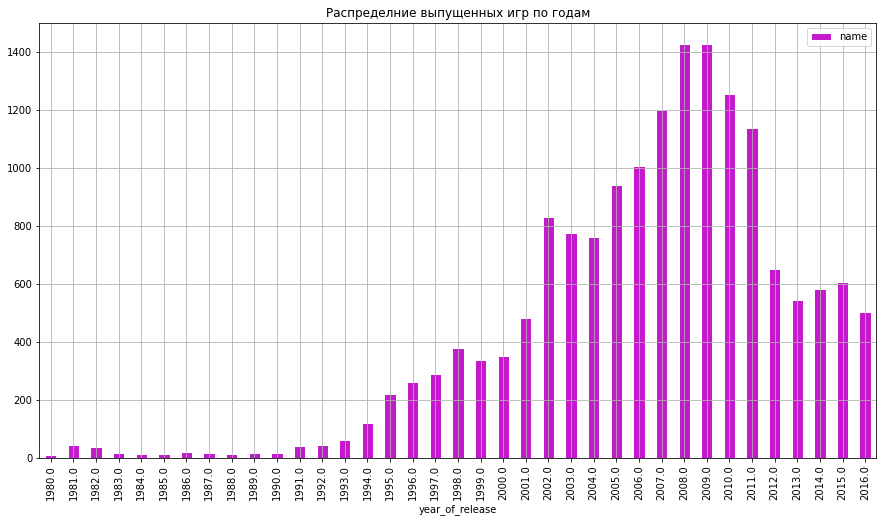

In [31]:
# построение столбчатой диаграммы 
data_year.plot(y='name', kind='bar', grid=True, figsize=(15,8), ec='white', 
               color=(0.77, 0.10, 0.8), title='Распределние выпущенных игр по годам')
None

Активное развитие компьютерных игр началось с 1995 года, до этого момента компьютерных игр почти не было. Резкий скачок по развитию компьютерных игр произошел в 2002 году, пик развития приходится на 2008 - 2009 годы, после чего выпуск компьютерных игр пошел на спад. Это напрямую можно связать с внедрением в жизни людей смартфонов, социальный сетей, соответсвенно характерезующимся потерей интереса к компьюетрным играм.

##### Изменение продаж по платформам

Выберем платформы с наибольшими суммарными продажами

In [32]:
# создание сводной таблицы: группируем по платформе и считаем суммарный бюждет для каждой платформы
# сортировка по убыванию значений
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
# вывод 10 первых строк 
data_platform.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


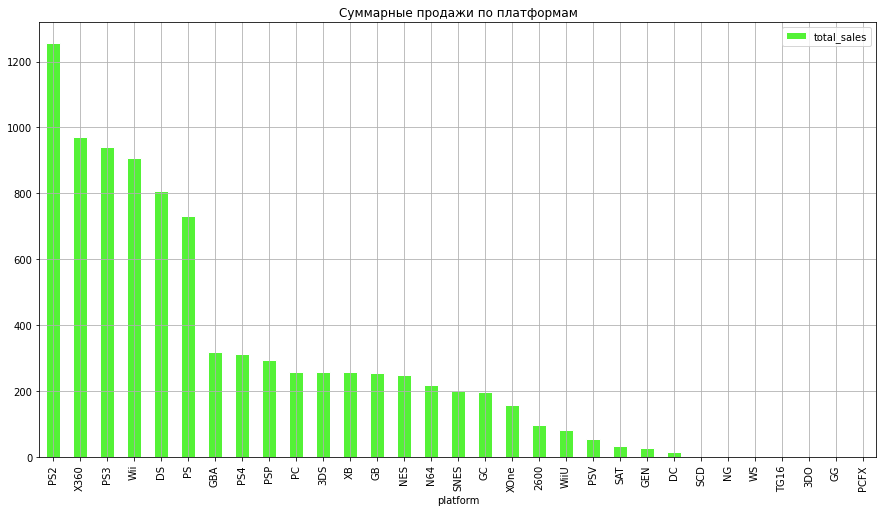

In [33]:
# построение столбчатой диаграммы
data_platform.plot(y='total_sales', kind='bar', grid=True, figsize=(15,8), ec='white', 
                   color=(0.33, 0.95, 0.21), title='Суммарные продажи по платформам')
None

In [34]:
data_platform.index[:6].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

По графику и таблице можно выделить топ-6 платформ с наибольшими суммарными продажами: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Для этих платформ построим распределение продаж по годам.

Для каждой из 6 вышеназванных плафторм построим график распределения продаж по годам. 

Для этого создам функцию: сделаю срез данных исходной таблицы с соответсвующим названием платформы, создад сводную таблицу с группировкой по году выпуска и подсчитаю суммарные продажи, по данной таблице построю графики.

##### Cоздание функции

In [35]:
# создание функции
def price(df, query):
    # создание словаря для заголовков графиков
    title = {'platform == "PS2"':'Распределение продаж по годам для PS2', 
             'platform == "X360"': 'Распределение продаж по годам для X360',
             'platform == "PS3"': 'Распределение продаж по годам для PS3',
             'platform == "Wii"':'Распределение продаж по годам для Wii', 
             'platform == "DS"': 'Распределение продаж по годам для DS',
             'platform == "PS"': 'Распределение продаж по годам для PS',
             'platform == "PS4"':'Распределение продаж по годам для PS4', 
             'platform == "XOne"': 'Распределение продаж по годам для XOne',
             'platform == "3DS"': 'Распределение продаж по годам для 3DS'}
    
    # создание сводной таблицы по соответсвующему срезу даных
    # группировка по году выпуска и подсчет суммарного бюджета
    df_pivot = df.query(query).pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    df_pivot = df_pivot.reset_index()
    # создание графика
    plot = df_pivot.plot(x='year_of_release', y='total_sales',grid=True, style='o-', figsize=(15,8), color='purple',
                         title=title[query])
    
    return plot

###### PS2

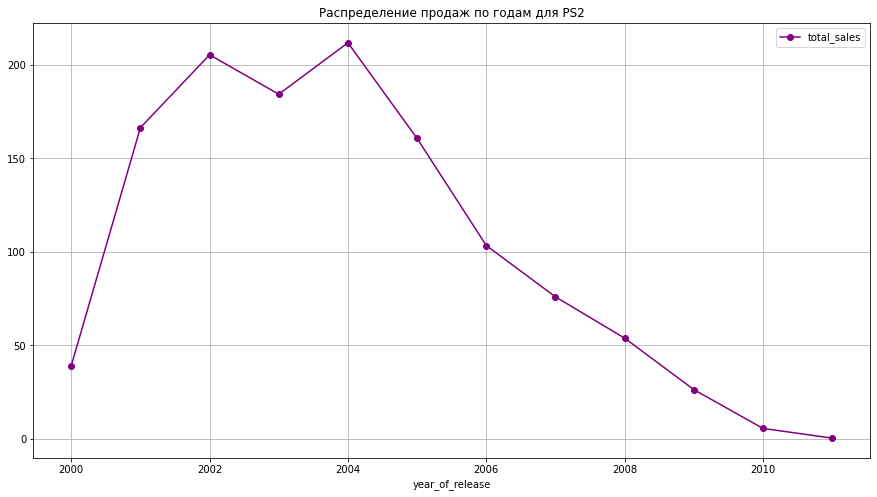

In [36]:
price(data, query='platform == "PS2"')
None



Выпуск с 2000 по 2011 год. Была пригодна для "жизни" 11 лет.

###### X360

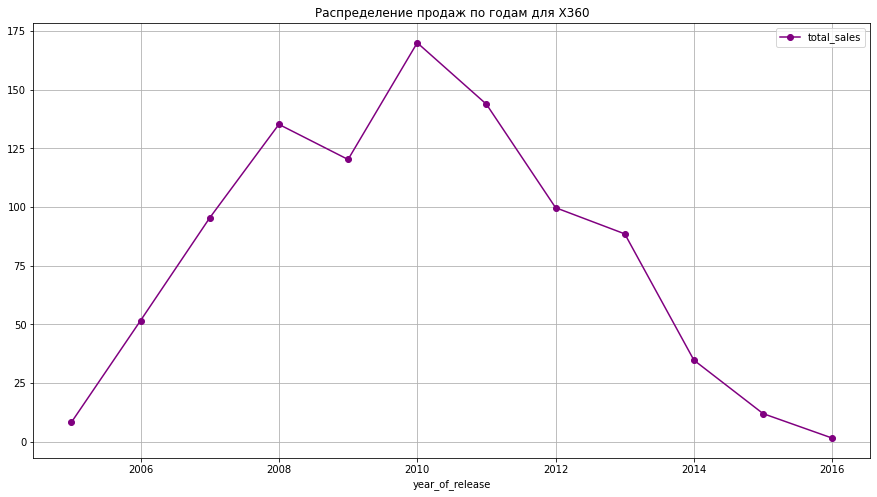

In [37]:
price(data, query='platform == "X360"')
None

Выпуск с 2005 по 2016 год. Была пригодна для "жизни" 11 лет.

###### PS3

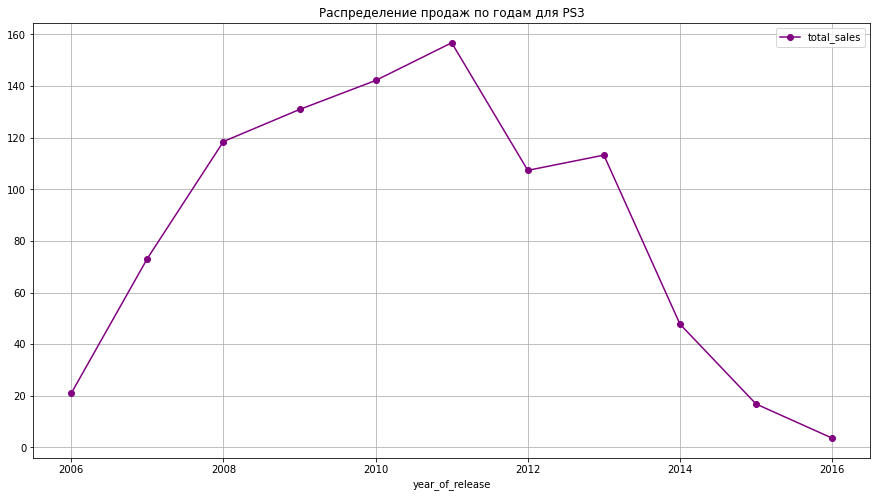

In [38]:
price(data, query='platform == "PS3"')
None

Выпуск с 2006 по 2016 год. Была пригодна для "жизни" 10 лет.

###### Wii

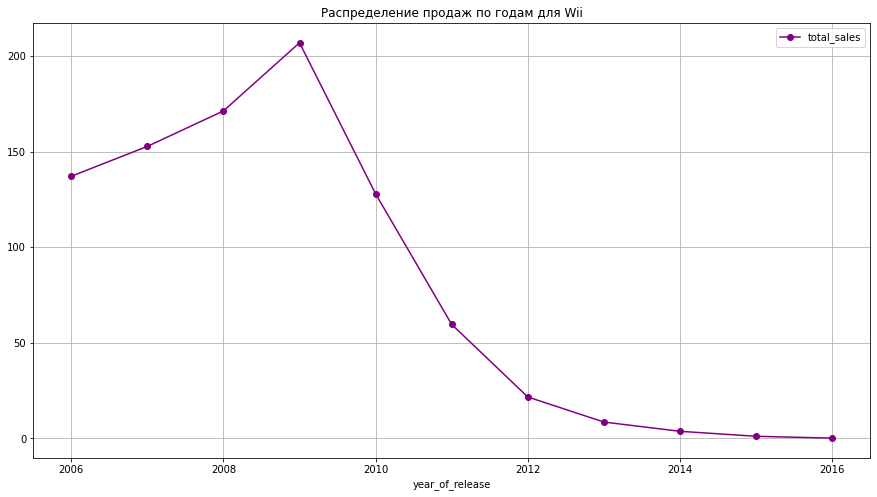

In [39]:
price(data, query='platform == "Wii"')
None

Выпуск с 2006 по 2016 год. Была пригодна для "жизни" 11 лет.

###### DS

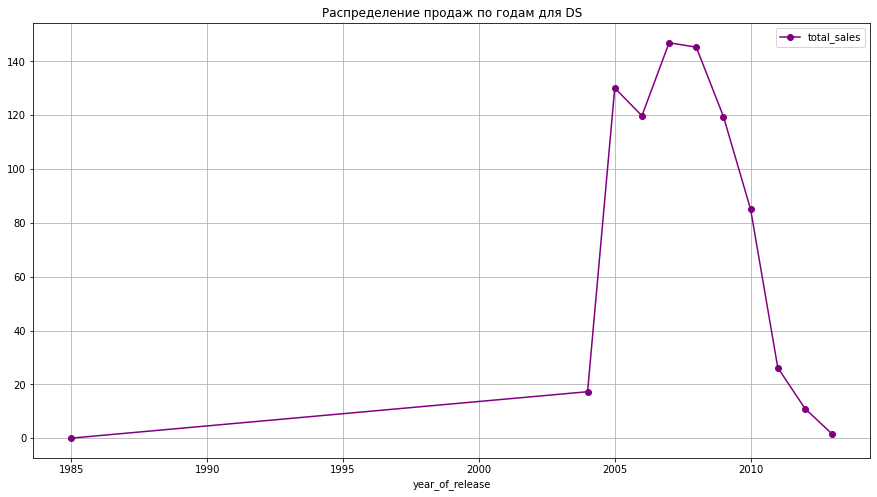

In [40]:
price(data, query='platform == "DS"')
None

Выпуск в 1985 году. С этого момента по 2004 год нет данных. С 2004 по 2013 год имела популярность. Была пригодна для "жизни" 9 лет.

Проверю данные по платформе DS до 2004 года.

In [41]:
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,0.0,0.0,indefined,0.02


Удалю данную строку, так как в 1985 году этой платформы еще не существовало. Применю функцию повторно

In [42]:
data = data.drop(index=15957)

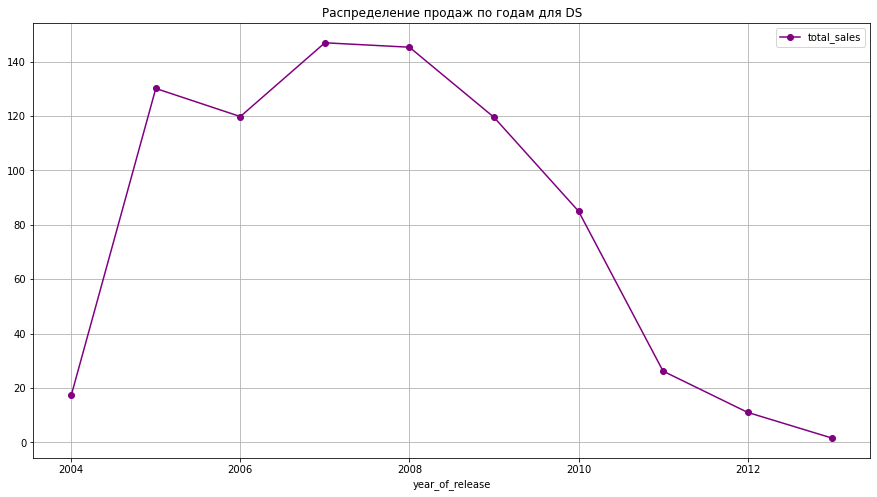

In [43]:
price(data, query='platform == "DS"')
None

Жизненный цикл платформы с 2004 по 2013 год имела популярность. Была пригодна для "жизни" 9 лет.

###### PS

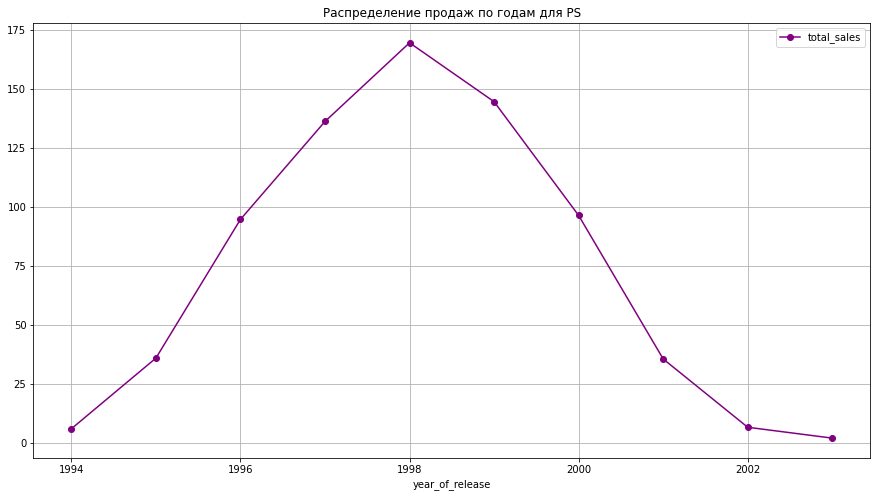

In [44]:
price(data, query='platform == "PS"')
None

Выпуск с 1994 по 2003 год. Была пригодна для "жизни" 9 лет.

Можно сделать вывод, что средняя продолжительность популярности платформы состовляет 10 лет.

##### Анализ данных за актуальный период

Выделим актуальный период - период, содержащий данные, которые помогут построить прогноз на 2017 год.

По диаграмме Распределние выпущенных игр по годам (шаг 3.1) можно выделить актуальный период с 2005 по 2016 год.

**По этим данным ответим на следующие вопросы:**

1) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

2) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

3) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

4) Соотнесите выводы с продажами игр на других платформах.

5) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами

###### Какие платформы лидируют по продажам, растут или падают?

Рассмотрю платформы, лидирующие по продажам в 2016 году.

In [45]:
# создание среза с актуальным периодом
data.query('year_of_release == 2016').pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

total_sales
year_of_release platform             
2016.0          PS4             69.25
                XOne            26.15
                3DS             15.14
                PC               5.25
                WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18

Потенциально прибыльными платформами на 2016 год можно назвать следующие: PS4, XOne, 3DS.

Рассмотрим распределние продаж по этим платформам за актуальный период. Для этого сделаем срез данных с 2011 по 2016 год

In [46]:
# создание среза
data_actual = data.query('year_of_release >= 2014')

Применим функцию *price* для соответсвующей таблицы и платформ

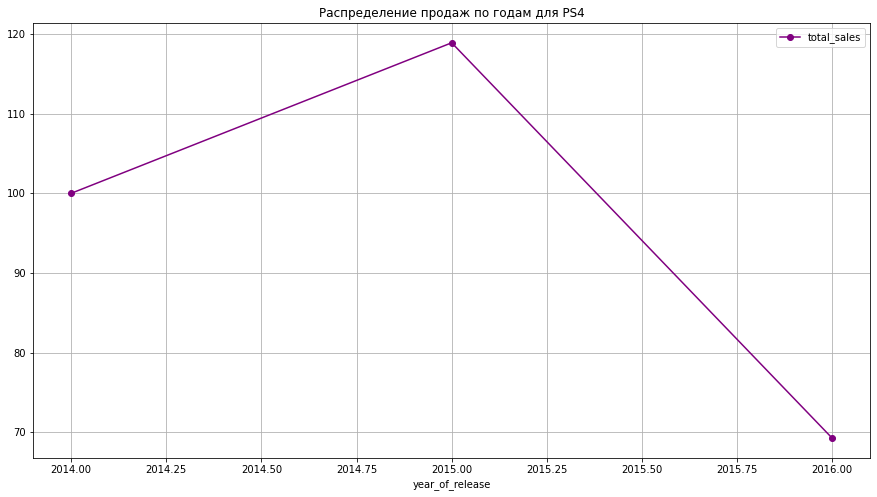

In [47]:
price(data_actual, query='platform == "PS4"')
None

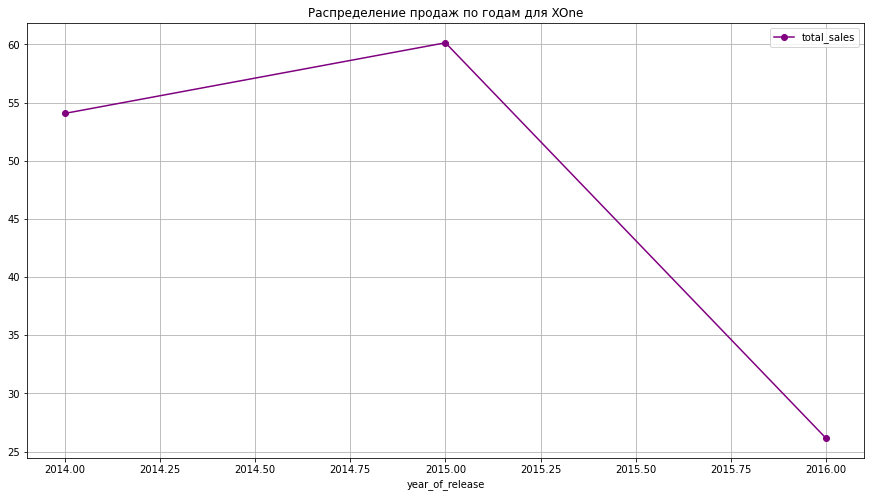

In [48]:
price(data_actual, query='platform == "XOne"')
None

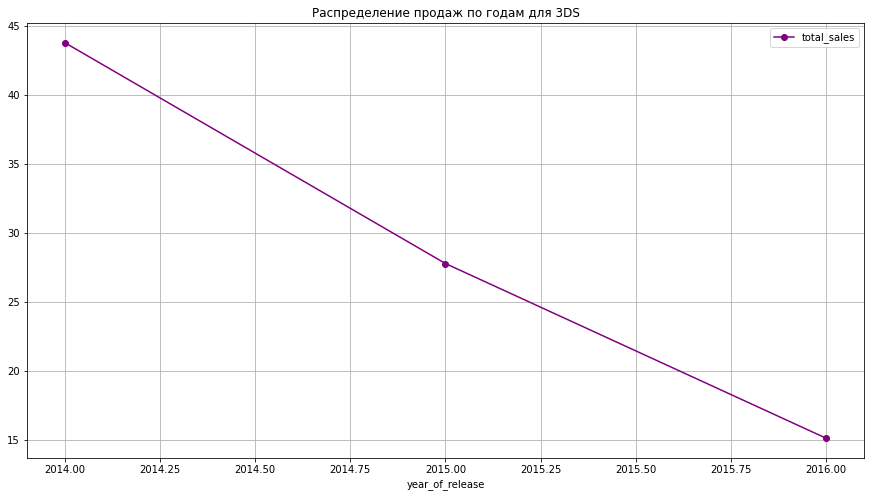

In [49]:
price(data_actual, query='platform == "3DS"')
None

По всем из этих трех платформ видно снижение продаж к 2016 году. Рассмотрю общую картину продаж за актуальный период

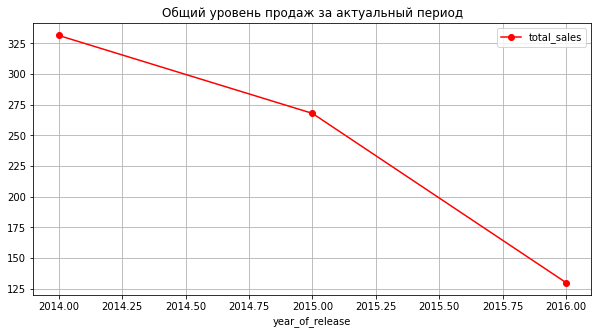

In [50]:
data_actual_plot = data_actual.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
data_actual_plot.plot(x='year_of_release', y='total_sales', style='o-', grid=True, 
               figsize=(10,5), color='red', title='Общий уровень продаж за актуальный период')
None

По графику видно, что к 2016 году продажи снижаются, а ,значит, можно сделать вывод, что рынок компьютерных игр падает.

###### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Построим boxplot для столбца с продажами

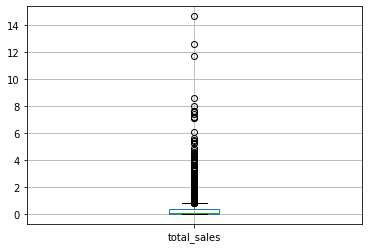

In [51]:
data_actual.boxplot('total_sales')
None

Рассмотрим ближе и выведем общую информацию

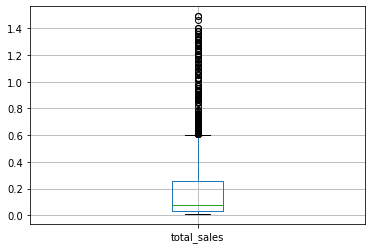

In [52]:
data_actual.query('total_sales < 1.5').boxplot('total_sales')
None

In [53]:
data_actual['total_sales'].describe().to_frame()

,total_sales
count,1689.000000
mean,0.431883
std,1.056109
min,0.010000
25%,0.030000
50%,0.100000
75%,0.350000
max,14.630000


В среднем, продажи игр составляют полумиллиона копий. Медиана - 0,1 миллионов игр. Макимальное значение продаж - 14,6 миллиона игр.

**Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для этого определю топ платформ за актуальный период.**

In [54]:
# создание сводной таблицы: группируем по платформе и считаем суммарный бюждет для каждой платформы
# сортировка по убыванию значений
data_platform_actual = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
# вывод 10 первых строк 
data_platform_actual.head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Построим график "ящик с усами" для топ-5 платформ.

In [55]:
data_platform_actual.index[:5].tolist()

['PS4', 'XOne', '3DS', 'PS3', 'X360']

In [56]:
# создание функции для построения "ящика с усами"

def boxplot(title, query):
    data_query = data_actual.query(query)
    column = query.split()[0]
    box = data_query.query('total_sales < 3').boxplot(column='total_sales', by=column, fontsize=25, figsize=(25,10))
    plt.suptitle(title, y=0.94, fontsize=25)
    plt.xlabel('')
    plt.title('')
    return box

Применим функцию boxplot для топ-5 платформ.

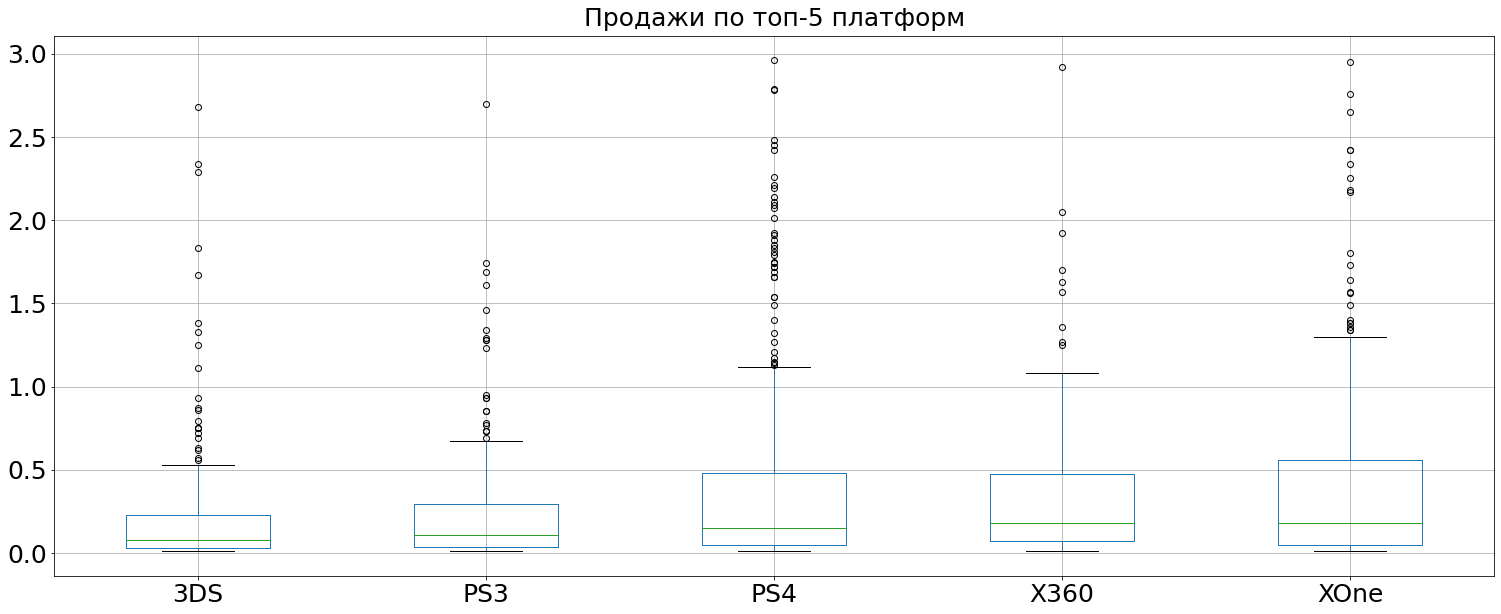

In [57]:
top_platforms_actual = ['PS3', 'X360', 'PS4', '3DS', 'XOne']
boxplot('Продажи по топ-5 платформ', query = 'platform in @top_platforms_actual')
None

В среднем, продажи игр составляют около 1,3 млн копий у XOne

Около 1,2 млн копий у PS4, X360

0,6 млн копий у PS3

3DS, у которой среднее значение продаж 0,5 млн копий. 

Медиана по топовым платформам - от 0,1 до 0,3 млн копий.

Самые низкие показатели продаж среди топ-5 платформ у платформы 3DS.

###### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Буду рассматривать влияние на продажи внутри платформы PS4, так как она входит в топ-5 платформ за актуальный период и в топ-10 платформ на 2016 год. Также буду использовать срез данных для того, чтобы убрать игры с нулевым рейтингом (замена пропущенных значений)

**Зависимость продаж от отзывов пользователей.**

In [58]:
# создание среза с ненулевым рейтингом пользователей и платформой PS3
data_user_score = data_actual.query('user_score != 0 and platform == "PS4"')

In [59]:
# подсчет коэффициента корреляции
data_user_score['total_sales'].corr(data_user_score['user_score']).round(2)

-0.04

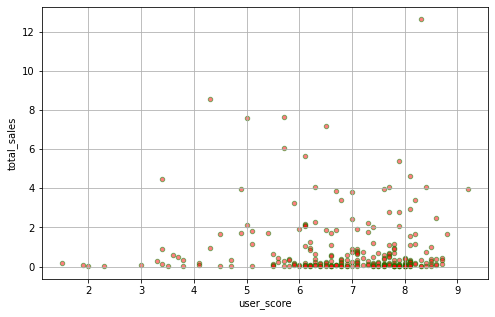

In [60]:
# построение диаграммы рассеяния
data_user_score.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, 
                     color='red', ec='green', figsize=(8,5))
None

**Зависимость продаж от отзывов критиков.**

In [61]:
# создание среза с ненулевым рейтингом критиков и платформой PS3
data_critic_score = data_actual.query('critic_score != 0 and platform == "PS4"')

In [62]:
# подсчет коэффициента корреляции
data_critic_score['total_sales'].corr(data_critic_score['critic_score']).round(2)

0.4

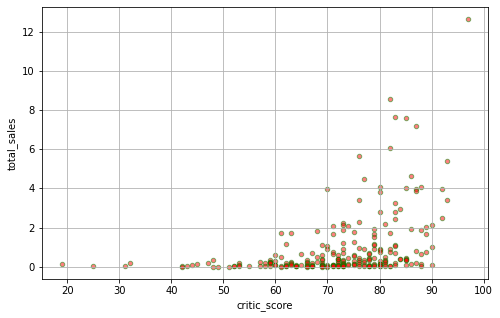

In [63]:
# построение диаграммы рассеяния
data_critic_score.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, 
                     color='red', ec='green', figsize=(8,5))
None

По графикам видно, что в среднем с увеличением рейтинга пользователей и критиков, увеличивается средний уровень продаж. Также на графиках есть выбросы с высоким уровнем продаж, но низкой оценкой пользователей. Это может быть связано с тем, что выходили новые версии популярных игр, которые не оправдывали ожидания пользователей.

По коэффициенту корреялции видно, что зависимости в случае с оценкой от пользователей нет, слабо проявляется зависимость в случае с оценкой критиков.

###### Соотнесите выводы с продажами игр на других платформах.

In [64]:
data_platform_actual.head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


В данном случае рассмотрю платформы, лидирующие по продажам за актуальный период времени: X360, WiiU, PC, PS3, XOne, 3DS. 

Создам функцию corr, которая будет вычислять коэффициент корреляции между отзывами критиков, пользователей и уровнем продаж.

In [65]:
# создание функции corr
def corr(query):  
# создание словаря для названия таблицы с данными о корреляции

    title = {'platform == "X360"': 'Корреляция для X360',
             'platform == "WiiU"':'Корреляция для WiiU', 
             'platform == "3DS"': 'Корреляция для 3DS',
             'platform == "PC"': 'Корреляция для PC',
             'platform == "PS3"':'Корреляция для PS3', 
             'platform == "XOne"': 'Корреляция для XOne'}
    
    # создание среза для соответсвующей платформы
    data_query = data_actual.query(query)
    
    # подсчет коэффициента корреляции между отзывами пользователей и продажами
    corr_users = data_query.query('user_score != 0')['total_sales'].corr(data['user_score']).round(2)
    
    # подсчет коэффициента корреляции между отзывами критиков и продажами
    corr_critic = data_query.query('critic_score != 0')['total_sales'].corr(data['critic_score']).round(2)
    
    # создание таблицы с данными о корреляции продаж с соответсвующим критерием 
    data_corr = pd.DataFrame(data=[['critic_score', corr_critic], ['user_score', corr_users]], 
                             columns=['Критерий', 'Корреляция с продажами'])
    print(title[query])
    
    return data_corr

Применение функции corr для выбранных платформ.

In [66]:
corr(query='platform == "X360"')

Корреляция для X360


,Критерий,Корреляция с продажами
0,critic_score,0.53
1,user_score,-0.14


In [67]:
corr(query='platform == "WiiU"')

Корреляция для WiiU


,Критерий,Корреляция с продажами
0,critic_score,0.37
1,user_score,0.41


In [68]:
corr(query='platform == "3DS"')

Корреляция для 3DS


,Критерий,Корреляция с продажами
0,critic_score,0.31
1,user_score,0.22


In [69]:
corr(query='platform == "PC"')

Корреляция для PC


,Критерий,Корреляция с продажами
0,critic_score,0.17
1,user_score,-0.07


In [70]:
corr(query='platform == "PS3"')

Корреляция для PS3


,Критерий,Корреляция с продажами
0,critic_score,0.45
1,user_score,-0.17


In [71]:
corr(query='platform == "XOne"')

Корреляция для XOne


,Критерий,Корреляция с продажами
0,critic_score,0.43
1,user_score,-0.07


В целом по всем платформам прослеживается следующее: большее влияние на продажи оказывает оценка критиков, чем оценка пользователей. Видимо, экспертный отзыв весомее любительского.

Наибольшее влияние оценка критиков на продажи оказывает на платформах **PS3**  (корреляция 0.45), **X360**  (корреляция 0.53), **XOne**  (корреляция 0.43), что неудивительно, ведь PlayStation и Xbox наиболее популярные консоли и пользователи готовы приобретать игры, ссылаясь на экспертные отзывы. 

При этом на платформах **XOne**, **PS3**, **PC** и **X360**отрицательная корреляция между продажами и отзывами пользователей. Вероятно, из-за того, что на 2016 год они были новыми и приносили продажи игр по нашумевшей популярности, при этом не удовлетворяя ожидания пользователей или оценок слишком мало.


Создам функцию для построения диаграмм рассеяния для соответсвующих платформ.

In [72]:
# создание функции d
def d(query):  
# создание словаря для названия диаграмм рассеяния

    title = {'platform == "X360"': 'Диаграммы рассеяния для X360',
             'platform == "WiiU"':'Диаграммы рассеяния для WiiU', 
             'platform == "3DS"': 'Диаграммы рассеяния для 3DS',
             'platform == "PC"': 'Диаграммы рассеяния для PC',
             'platform == "PS3"':'Диаграммы рассеяния для PS3', 
             'platform == "XOne"': 'Диаграммы рассеяния для XOne'}
    
    # создание среза для соответсвующей платформы
    data_query = data_actual.query(query)
    
    # построение диаграммы рассеяния между отзывами пользователей и продажами
    d_users = data_query.query('user_score != 0').plot(kind='scatter', x='user_score', y='total_sales', 
                                                          grid=True, alpha=0.5, color='red', ec='green', figsize=(8,5))
    
    # построение диаграммы рассеяния между отзывами критиков и продажами
    d_critic = data_query.query('critic_score != 0').plot(kind='scatter', x='critic_score', y='total_sales', 
                                                          grid=True, alpha=0.5, color='red', ec='green', figsize=(8,5))
    
   
    print(title[query])
    
    return d_users, d_critic

Диаграммы рассеяния для X360


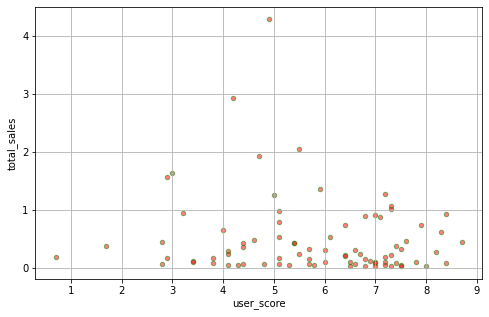

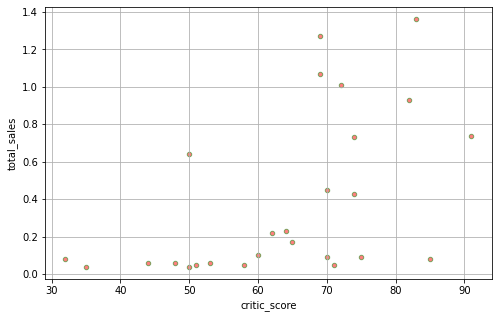

In [73]:
d(query='platform == "X360"')
None

Диаграммы рассеяния для WiiU


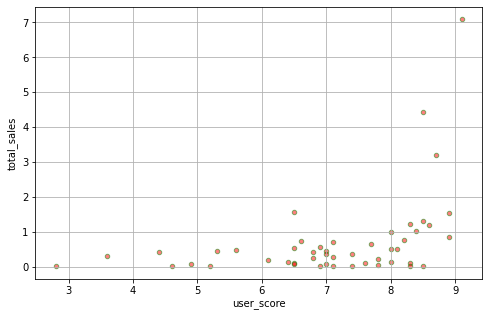

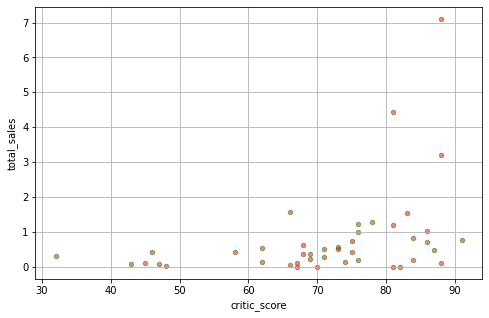

In [74]:
d(query='platform == "WiiU"')
None

Диаграммы рассеяния для 3DS


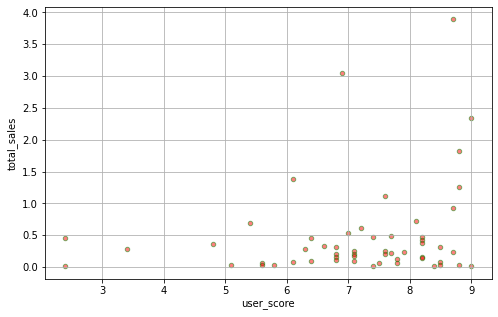

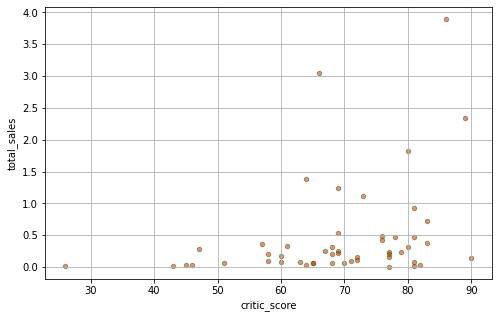

In [75]:
d(query='platform == "3DS"')
None

Диаграммы рассеяния для PC


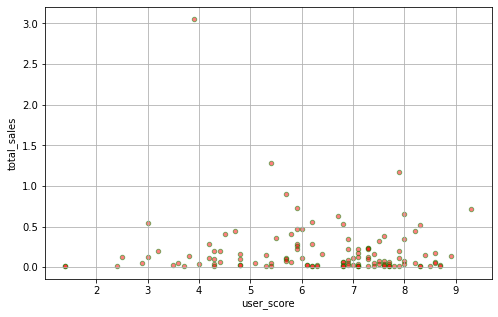

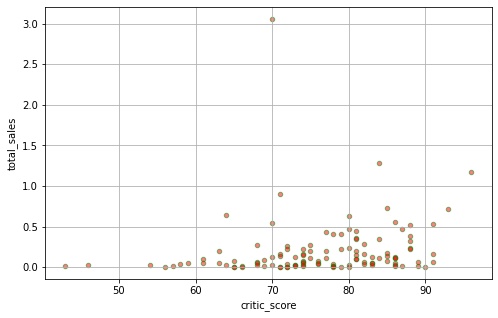

In [76]:
d(query='platform == "PC"')
None

Диаграммы рассеяния для PS3


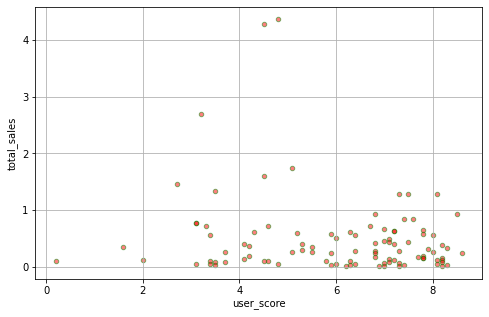

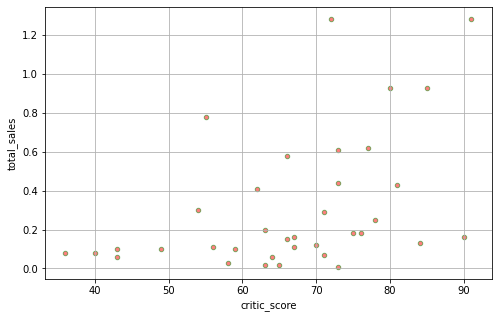

In [77]:
d(query='platform == "PS3"')
None

Диаграммы рассеяния для XOne


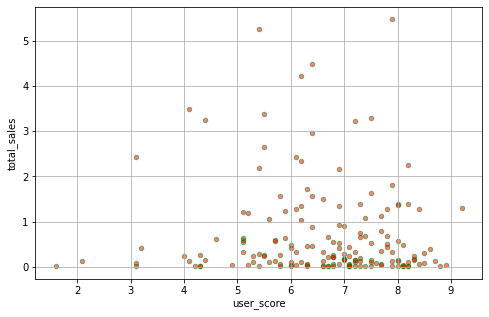

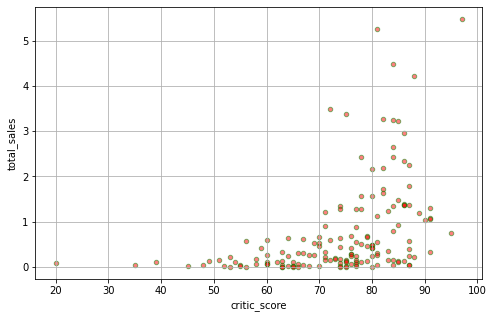

In [78]:
d(query='platform == "XOne"')
None

Вывод о том, что в среднем с увеличением рейтинга пользователей и критиков, увеличивается средний уровень продаж подтверждается для платформ **WiiU**, **3DS** и **PC**, но тоже присутсвуют выбросы с высоким уровнем продаж, но низкой оценкой пользователей. 


С платформами **PS3** и **XOne** интереснее. Диаграммы рассеяния с большим количеством выбросов подтверждают значений коэффициента корреляции. Так как это приставки новых поколений PlayStation и Xbox - они могли не оправдать ожидания многих пользователей.

###### Посмотрите на общее распределение игр по жанрам.

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим сначала распределние проданных игр по жанрам.

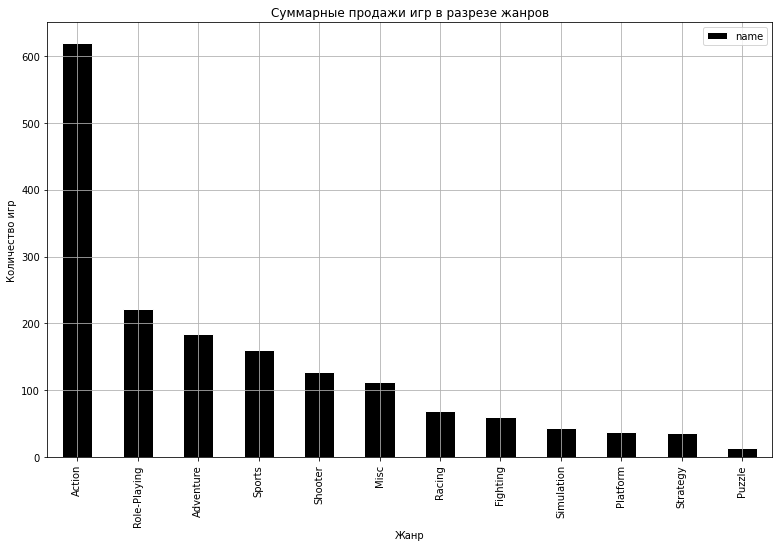

In [79]:
data_genre_count = data_actual.pivot_table(index='genre', values='name', 
                 aggfunc='count').sort_values('name', ascending=False)
data_genre_count.plot( kind='bar', figsize=(13,8), grid=True, ec='white', color='black')
plt.title('Суммарные продажи игр в разрезе жанров')
plt.ylabel('Количество игр')
plt.xlabel('Жанр')
None

**По количетсву проданных игр** лидируют следующие жанры: Action, Role-Playing, Adventure
Самыми невостребованными оказались стратегически игры, игры- головоломки, игры- платформы.


Можно сказать, что пользователи предпочитают игры, в которых есть скорость действий, экшн: Action, а игры, в которых требуется усидчивость, мыслытельная деятельность или присутствует медленная смена действий - менее предпочтительны.

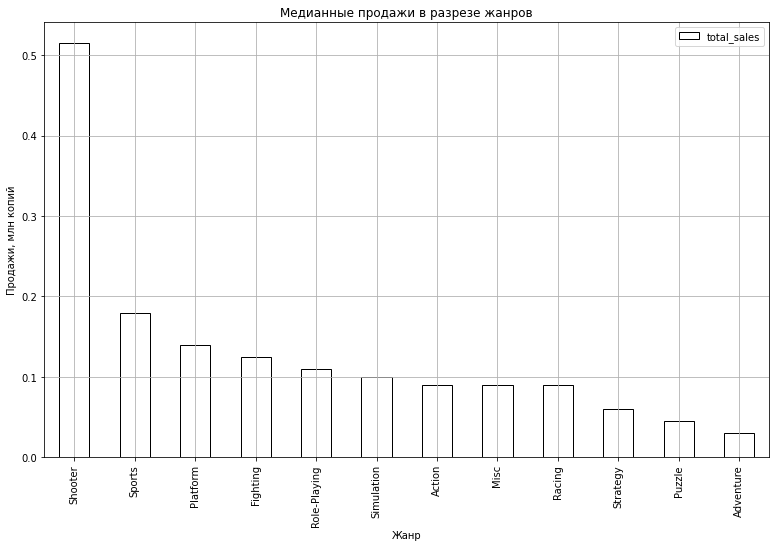

In [80]:
data_genre_sales = data_actual.pivot_table(index='genre', values='total_sales', 
                 aggfunc='median').sort_values('total_sales', ascending=False)
data_genre_sales.plot( kind='bar', figsize=(13,8), grid=True, ec='black', color='white')
plt.title('Медианные продажи в разрезе жанров')
plt.ylabel('Продажи, млн копий')
plt.xlabel('Жанр')
None

In [81]:
# создание функции для построения "ящика с усами"

def boxplot_genre(title, query):
    data_query = data_actual.query(query)
    column = query.split()[0]
    box = data_query.query('total_sales < 3').boxplot(column='total_sales', by=column, fontsize=25, figsize=(25,10))
    plt.suptitle(title, y=0.94, fontsize=25)
    plt.xlabel('')
    plt.title('')
    return boxplot_genre

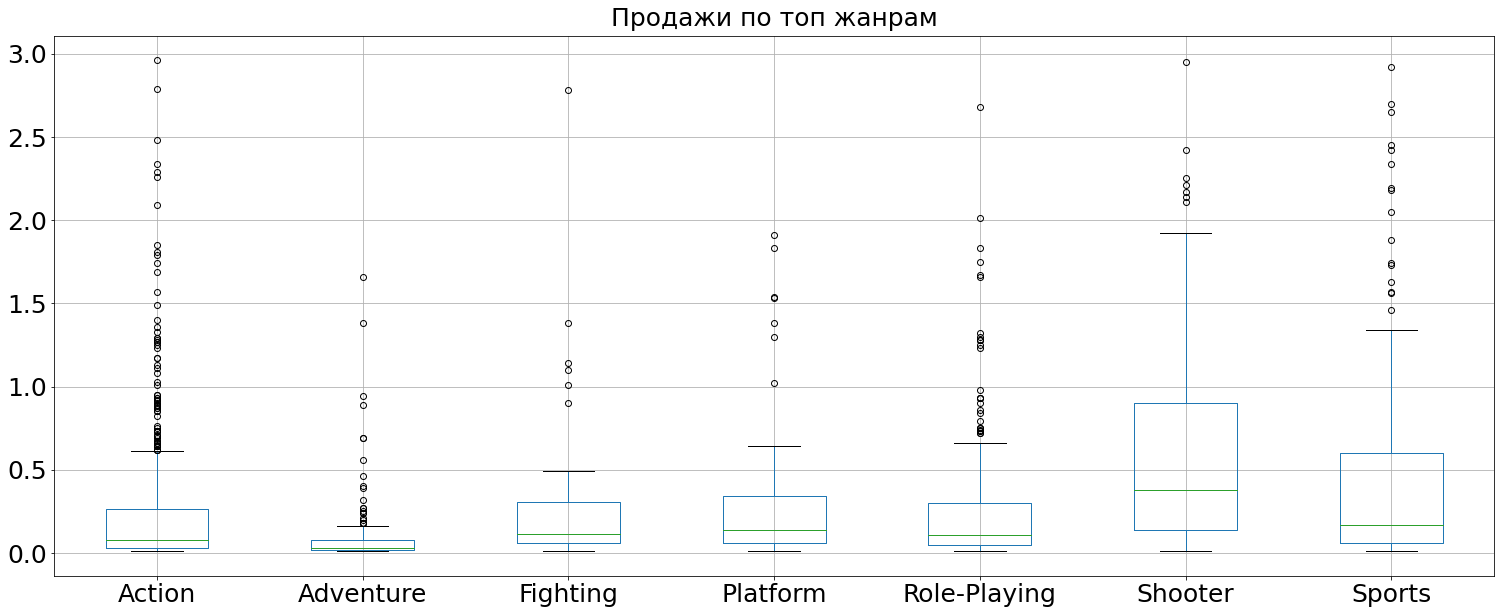

In [82]:
top_genre_actual = ['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing', 'Action', 'Adventure']
boxplot_genre('Продажи по топ жанрам', query = 'genre in @top_genre_actual')
None

Если смотреть на средний уровень продажности игр по жанрам, лидирует жанр Shooter, далее жанр Sports и замыкает эту тройку - игры жанра Platform.

Жанр Action выбыл из топ-5. Такой результат говорит том, что в лидирующих жанрах есть игры-хиты с многомиллионными продажами.

###### Вывод:

**В процессе исследовательского анализа выявлено:**

- резкий скачок по развитию компьютерных игр произошел в 2002 году с пиком развития, приходящимся на 2008 - 2009 годы

- за весь указанный в данных период можно выделить топ-6 платформ с наибольшими суммарными продажами: **PS2**, **X360**, **PS3**, **Wii**, **DS**, **PS**. При этом на 2016 год лидирующими по продажам являются новые версии наиболее популярных консолей PlayStation, Xbox и Nintendo: **PS4**, **XOne**, **3DS**

- средняя продолжительность «жизни» платформ составляет 10 лет, далее на смену приходят новые версии

- самый высокий средний уровень продаж за актуальный период у **PS4**

- на объем продаж большее влияние оказывают отзывы критиков, чем отзывы пользователей (или хороший маркетинг, судя по выбросам в диаграммах рассеяния)

- пользователи предпочитают игры, в которых есть скорость действий, экшн: Action, Sports, Shooter; а игры, в которых требуется усидчивость, мыслытельная деятельность или присутствует медленная смена действий - менее предпочтительны.


####  Составьте портрет пользователя каждого региона.

На данном этапе работы определим для пользователя каждого региона (NA, EU, JP):

 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5).
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [83]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,indefined,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,indefined,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,indefined,7.98


Напишу функцию by_region для прорисовки столбчатых диаграмм для выявления популярных платформ, популярных жанров, влияния рейтинга ESBR по регионам.

In [84]:
# создание фцнкции
def by_region(index, values):
    
    # создания словаря для заголовков диаграмм по регионам
    title = {'na_sales': 'Продажи в Северной Америке', 
             'eu_sales': 'Продажи в Европе', 
             'jp_sales': 'Продажи в Японии'}
    
    # создания словаря для цветом диаграмм по регионам
    color= {'na_sales': 'blue', 
            'eu_sales': 'green', 
            'jp_sales': 'red'}
    
    # условие если query не задан, построить столбчатую диаграмму по сводной таблице
   
    data_region = data_actual.pivot_table(index=index, values=values, aggfunc='sum').sort_values(values, ascending=False)[:5]
    data_region_plot = data_region.plot(kind='bar', grid=True, figsize=(5,5), title=title[values],
                                            ec='red', color=color[values], alpha=0.5)
 
            
    return data_region_plot

Далее применю функцию by_region с соотвутсвующими аргументами.

##### Самые популярные платформы (топ-5)

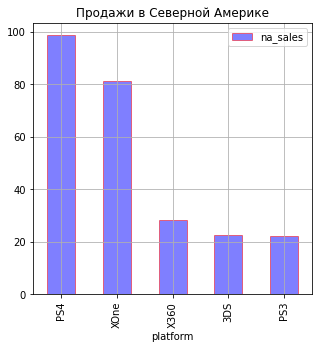

In [85]:
by_region('platform', 'na_sales')
None

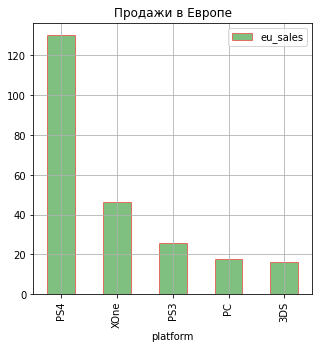

In [86]:
by_region('platform', 'eu_sales')
None

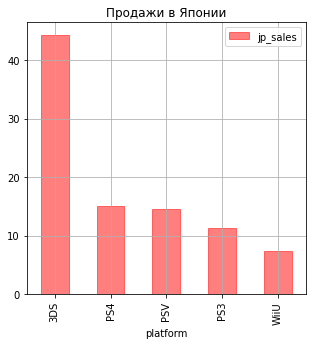

In [87]:
by_region('platform', 'jp_sales')
None

В **Северной Америке** популярными являлись приставки PS4 и XOne, менее востребованы X360, 3DS и PS3.

В **Европе** популярнее всего PS4, далее XOne и PS3, на последних местах в топ-5 платформ с небольшой разницей вошли 3DS и PC.

В **Японии** популярнее остальных - платформа 3DS. Далее c небольшим разрывом PS4 и PSV,  PS3 и WiiU соответсвенно.


##### Самые популярные жанры (топ-5)

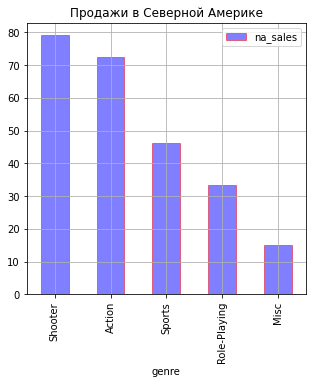

In [88]:
by_region('genre', 'na_sales')
None

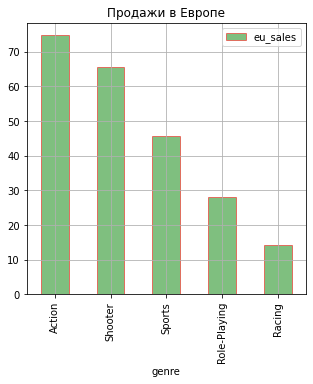

In [89]:
by_region('genre', 'eu_sales')
None

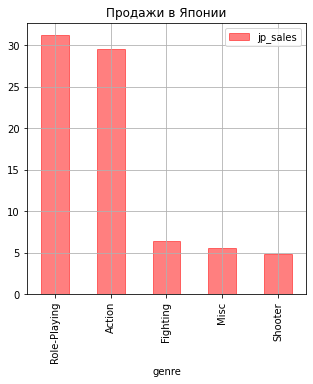

In [90]:
by_region('genre', 'jp_sales')
None

В Северной Америке и Европе одинаково почти расположились на 3,4 местах игры жанров Sports и Role-Playing соответсвенно.
Разница в 1 и 2 месте: в Северной Америке на 1 месте Shooters, на 2 - Action, а в Европе наоборот, но разница небольшая.

Также отличаются жанры игр на 5 месте. В Северной Америке - это игры жанра Misc, а в Европе - игры жанра Racing (гонки).

В Японии картина индивидуальная - больше всего игр жанра Role-Playing, чуть менее популярный жанр - Action, далее 3 жанра подряд с небольшой разницей: Fighting, Miscи и Shooters.

Разница в таком распределении по жанрам может быть в том, что японцы - уникальные и среди них много хикков, которые пытаются переложить отсутсвие реальной социальной жизни на виртуальную, то есть на ролевые игры.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала введем расшифровку рейтинга от ESBR:
-	«E» («Everyone») — «Для всех»
-	«T» («Teen») — «Подросткам» от 13 лет
-	«M» («Mature») — «Для взрослых»
-	«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
-	Первоначально "K-A" ("Kids to Adults") – «от детей до взрослых»
-	«AO» («Adults Only 18+») — «Только для взрослых»
 

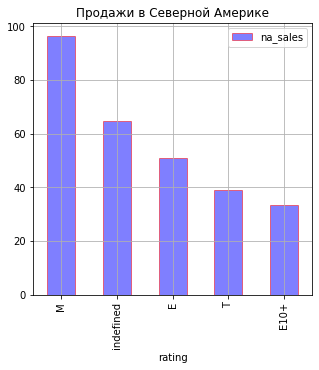

In [91]:
by_region('rating', 'na_sales')
None

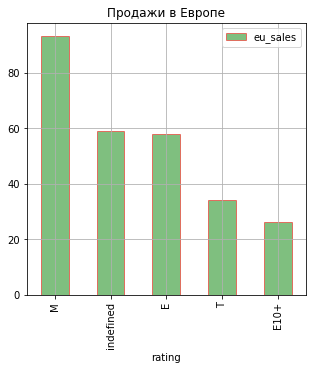

In [92]:
by_region('rating', 'eu_sales')
None

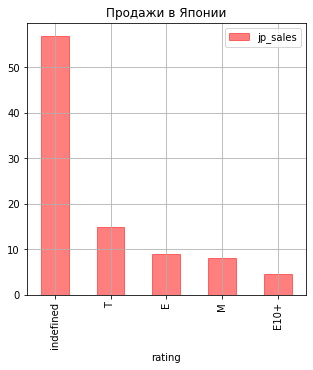

In [93]:
by_region('rating', 'jp_sales')
None

Во **Северное Америке** и **Европе** большая часть продаж по играм с рейтингом **Для взрослых**. Также в этих регионах с небольшой разницей распродаются игры **Для всех** и игры без рейтинга. На 4 и 5 местах с небольшой разницей расположитлись игры категорий **от 10 лет и старше** и **Подросткам от 13 лет**

В **Японии** значительная часть проадавемых игра без категории, далее с небольшой разницей игры категорий **Подросткам от 13 лет**, **Для всех**, , **Для взрослых** и **от 10 лет и старше** соответсвенно.

#### Проверка гипотез.

На данном этапе работы сформулирую и проверю следующие гипотезы:

    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    2) Средние пользовательские рейтинги жанров Action и Sports разные.

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о равенстве средних двух независимых гениральных совокупностей, используя t-тест. Для того, чтобы применять этот тест, проверим условия:

1) Гениральные совокупности не зависят друг от друга.

2) Дисперсии рассматриваемых генеральных совокупностей равны?


Для проверки гипотез воспользуюсь методом scipy.stats.ttest_ind() в Pandas, параметр alternative не буду указывать, так как мне нужно определить отличаются ли средние или нет.

Проверим объем данных для каждой гениральной совокупности.

In [94]:
data_actual.query('platform == "XOne" and user_score != 0')['user_score'].count()

165

In [95]:
data_actual.query('platform == "PC" and user_score != 0')['user_score'].count()

122

Дисперсии двух гениральных совокупностей неизвестны и гениральные совокупности разного объема, поэтому есть основания считать, что диспресии могут различаться. В связи с этим используем параметр equal_var=False.

**H0:** Нулевая гипотеза заключается в том, что cредний пользовательский рейтинг платформы **Xbox One** равен cреднему пользовательскому рейтингу платформы **PC**

**H1:** Альтернативаня гипотеза заключается в том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** отличаются.

In [96]:
xbox_users_score = data_actual.query('platform == "XOne" and user_score != 0')['user_score']
pc_users_score = data_actual.query('platform == "PC" and user_score != 0')['user_score']

alpha = .05
results = st.ttest_ind(xbox_users_score, pc_users_score, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


p-value получилось больше выбранного уровня 𝛼=0.05. Нулевая гипотеза не отвергнута, значит, нет оснований говорить о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** отличаются.

##### Средние пользовательские рейтинги жанров Action и Sports разные

Проверим гипотезу о равенстве средних двух независимых гениральных совокупностей, используя t-тест. Для того, чтобы применять этот тест, проверим условия:

1) Гениральные совокупности не зависят друг от друга.

2) Дисперсии рассматриваемых генеральных совокупностей равны?


Для проверки гипотез воспользуюсь методом scipy.stats.ttest_ind() в Pandas, параметр alternative не буду указывать, так как мне нужно определить отличаются ли средние или нет.

Проверим объем данных для каждой гениральной совокупности.


In [97]:
data_actual.query('genre == "Action" and user_score != 0')['user_score'].count()

297

In [98]:
data_actual.query('genre == "Sports" and user_score != 0')['user_score'].count()

127

Дисперсии двух гениральных совокупностей неизвестны и гениральные совокупности разного объема, поэтому есть основания считать, что диспресии могут различаться. В связи с этим используем параметр equal_var=False.

**H0:** Нулевая гипотеза заключается в том, что cредний пользовательский рейтинг жанра **Action** равен cреднему пользовательскому рейтингу жанра **Sports**

**H1:** Альтернативаня гипотеза заключается в том, что средние пользовательские рейтинги жанров **Action** и **Sports** отличаются.

In [99]:
action_users_score = data_actual.query('genre == "Action" and user_score != 0')['user_score']
sports_users_score = data_actual.query('genre == "Sports" and user_score != 0')['user_score']

alpha = .05
results = st.ttest_ind(action_users_score, sports_users_score, equal_var=False)

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.1825550382644557e-14
Отвергаем нулевую гипотезу


p-value получилось значительно меньше выбранного уровня 𝛼=0.05. Нулевая гипоетеза отвергнута, значит, есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports отличаются.

#### Вывод

Исследованы данные интернет-магазина компьютерных игр «Стримчик».

**На этапе предобработки данных выполнено:**

- названия колонок приведены к нижнему регистру
- в столбце user_score значения tbd заменены на Nan, после чего столбец приведен к числовому типу данных float);
- проверка на наличие явных дубликатов в таблице и наличие неявных дубликатов в столбце *genre*
- описаны спопосбы обработки и обработаны пропущенные значения следующим образом:
    * пропуски в столбцах *critic_score* и *user_score* заменены на 0
    * пропуски в столбце *rating* заменены на 'indefined'
    * удалены 2 строки с отсутсвующим названием игры и жанром
- добавлен столбец с суммарными продажами во всех регионах

**На этапе исследовательского анализа выявлено:**

- резкий скачок по развитию компьютерных игр произошел в 2002 году с пиком развития, приходящимся на 2008 - 2009 годы, после чего рынок компьютерных игра начал падать. 

- за весь указанный в данных период можно выделить топ-6 платформ с наибольшими суммарными продажами: **PS2**, **X360**, **PS3**, **Wii**, **DS**, **PS**. При этом на 2016 год лидирующими по продажам являются новые версии наиболее популярных консолей PlayStation, Xbox и Nintendo: **PS4**, **XOne**, **3DS**

- средняя продолжительность «жизни» платформ составляет 10 лет, далее на смену приходят новые версии

- самый высокий средний уровень продаж за актуальный перирд у **PS4**

- на объем продаж большее влияние оказывают отзывы критиков, чем отзывы пользователей (или хороший маркетинг, судя по выбросам в диаграммах рассеяния)

- пользователи предпочитают игры, в которых есть скорость действий, экшн: Action, Role-Playing, Adventure; а игры, в которых требуется усидчивость, мыслытельная деятельность или присутствует медленная смена действий - менее предпочтительны: Strategy, Platform, Puzzle

- если смотреть на средний уровень продажности игр по жанрам, лидирует жанр Shooter, далее жанр Sports и замыкает эту тройку - игры жанра Platform. Жанр Action выбыл из топ-5. Такой результат говорит том, что в лидирующих жанрах есть игры-хиты с многомиллионными продажами.

**Составлен портрет пользователя каждого региона:**

- В **Северной Америке** популярными являлись приставки PS4 и XOne, менее востребованы X360, 3DS и PS3.

    В **Европе** популярнее всего PS4, далее XOne и PS3, на последних местах в топ-5 платформ с небольшой разницей вошли 3DS и PC.

    В **Японии** популярнее остальных - платформа 3DS. Далее c небольшим разрывом PS4 и PSV,  PS3 и WiiU соответсвенно.

    
- **В Северной Америке** и **Европе** одинаково почти расположились на 3,4 местах игры жанров Sports и Role-Playing соответсвенно. Разница в 1 и 2 месте: в **Северной Америке** на 1 месте Shooters, на 2 - Action, а в **Европе** наоборот, но разница небольшая. Также отличаются жанры игр на 5 месте. В **Северной Америке** - это игры жанра Misc, а в Европе - игры жанра Racing (гонки).

    В **Японии** картина индивидуальная - больше всего игр жанра Role-Playing, чуть менее популярный жанр - Action, далее 3 жанра подряд с небольшой разницей: Fighting, Miscи и Shooters.
    
- Во **Северное Америке** и **Европе** большая часть продаж по играм с рейтингом **Для взрослых**. Также в этих регионах с небольшой разницей распродаются игры **Для всех** и игры без рейтинга. На 4 и 5 местах с небольшой разницей расположитлись игры категорий **от 10 лет и старше** и **Подросткам от 13 лет**

    В **Японии** значительная часть проадавемых игра без категории, далее с небольшой разницей игры категорий **Подросткам от 13 лет**, **Для всех**, , **Для взрослых** и **от 10 лет и старше** соответсвенно..
    
**Проверены гипотезы:**

    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        
   Нулевая гипотеза о том, что cредний пользовательский рейтинг платформы **Xbox One** равен cреднему пользовательскому рейтингу платформы **PC** не отвергнута, значит, нет оснований говорить о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** отличаются.
    
    2) Средние пользовательские рейтинги жанров Action и Sports разные.
        
   Нулевая гипоетеза о том, что cредний пользовательский рейтинг жанра **Action** равен cреднему пользовательскому рейтингу жанра **Sports** отвергнута, значит, есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports отличаются.
        
